In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
noise_ths=[f'0.{i}' for i in range(10)]

simclr_sym=np.array([77.2, 76.42, 75.53, 73.79, 71.37, 70.38, 67.13, 64.86, 61.64, 57.25])
simclr_asym=np.array([77.2, 77.06, 76.64, 76.04, 74.82, 72.6, 69.69, 65.55, 60.61, 54.95])

nnclr_sym=np.array([76.1, 75.5, 74.55, 73.04, 70.97, 69.23, 66.52, 65.37, 62.02, 58.45])
nnclr_asym=np.array([76.1, 76.02, 75.82, 75.28, 74.06, 71.32, 68.48, 64.91, 59.95, 55.61])

simsiam_sym=np.array([81.2, 80.5, 79.4, 78.3, 75.8, 74.4, 71.3, 68.6, 64.6, 60.0])
simsiam_asym=np.array([81.2, 81.1, 80.7, 79.6, 78.8, 76.4, 74.0, 69.4, 63.5, 57.6])

byol_sym=np.array([75.6, 74.8, 73.5, 72.0, 70.1, 68.5, 64.4, 62.8, 60.3, 56.3])
byol_asym=np.array([75.6, 75.4, 75.0, 74.2, 73.3, 70.7, 67.4, 64.3, 57.9, 53.2])

# ssl epochs: 663 -- not final results
moco_sym=np.array([86.08, 85.13, 83.89, 82.12, 79.0, 76.64, 73.88, 70.2, 66.86, 60.51])
moco_asym=np.array([86.08, 85.90, 85.42, 84.78, 83.29, 80.1, 75.98, 71.64, 65.47, 59.19])

# ssl epochs: 290 -- not final results
# bt_sym=np.array([79.57, 78.14, 76.17, 73.67, 71.04, 68.19, 65.49, 62.15, 59.65, 53.29])
# bt_asym=np.array([79.57, 79.4, 78.94, 77.72, 75.73, 72.36, 68.74, 64.06, 59.44, 53.91])

# ssl epochs: 1190
# bt_sym=np.array([86.1, 85.06, 83.59, 81.96, 79.72, 76.24, 73.65, 70.97, 65.7, 60.14])
# bt_asym=np.array([])

acc_sym = np.array([simclr_sym, nnclr_sym, simsiam_sym, byol_sym, moco_sym])#, bt_sym])
acc_asym = np.array([simclr_asym, nnclr_asym, simsiam_asym, byol_asym, moco_asym])#, bt_asym])
nn = np.array([noise_ths, noise_ths, noise_ths, noise_ths, noise_ths])#, noise_ths])

colors=['y', 'r', 'b', 'g', 'c', 'm']
labels=['simclr','nnclr', 'simsiam', 'byol', 'moco', 'barlow']

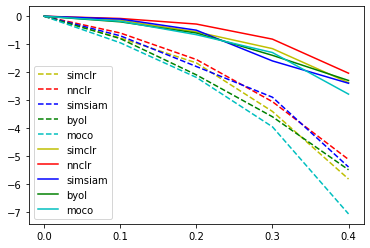

In [3]:
m=0
n=5

for i in range(len(acc_sym)):
    arr=acc_sym[i]
    ref=arr[0]
    plt.plot(noise_ths[m:n], (arr-ref)[m:n], colors[i], linestyle='--', label=labels[i])

for i in range(len(acc_asym)):
    arr=acc_asym[i]
    ref=arr[0]
    plt.plot(noise_ths[m:n], (arr-ref)[m:n], colors[i], label=labels[i])
plt.legend()

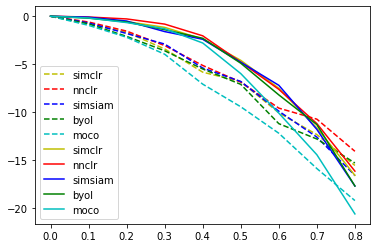

In [4]:
m=0
n=-1

for i in range(len(acc_sym)):
    arr=acc_sym[i]
    ref=arr[0]
    plt.plot(noise_ths[m:n], (arr-ref)[m:n], colors[i], linestyle='--', label=labels[i])

for i in range(len(acc_asym)):
    arr=acc_asym[i]
    ref=arr[0]
    plt.plot(noise_ths[m:n], (arr-ref)[m:n], colors[i], label=labels[i])
plt.legend()

### Takeaways:
- small amounts of asymmetric noise does not influence the accuracy too much
- model appears to be very resilient to small amounts of asym noise
- the methods that do not explicitly specify negatives in the loss appear to drop more significantly wrt noise
- with drastic noise levels the piece about +/- holds BUT with small amounts of noise it does not seem to be the case
    
    
    
    
- nnclr: +/-
- simclr: +/-
- byol: +/-    
- simsiam: +
- barlow: + (no explicit neg)
    

## Variance of accuracy drop wrt noise type

In [5]:
temp = np.array([arr-arr[0] for arr in acc_sym])
var_sym = np.var(temp,axis=0)

In [6]:
temp = np.array([arr-arr[0] for arr in acc_asym])
var_asym = np.var(temp,axis=0)

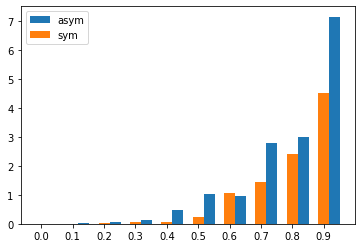

In [7]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x=np.arange(10)

y = var_asym
z = var_sym

ax = plt.subplot(111)

width = 0.35       

plt.bar(x + width, z, width, label='asym')
plt.bar(x        , y, width, label='sym')

plt.xticks(x, noise_ths)

ax.legend()
plt.show()

##### Verified that the sym/asym noise do not change the class distributions to the point it causes class imbalance

In [8]:
# import pickle as pkl
# path_template='/usr/local/extstore01/zahra/noisy_ssl/CIFAR10_noisy_checkpoints/cifar10_noise_asym_0.{}.pkl'
# for i in range(10):
#     if i==0:
#         continue
#     path_=path_template.format(i)
#     print(path_)

#     f = open(path_,'rb')
#     dataset=pkl.load(f)
    
#     plt.hist(dataset.targets)
#     plt.show()


## What's next?
- run experiments using different temperature parameters for MoCo and SimCLR to observe the effect of temperature on noise resilience
- run 50/50 experiment with supervised training and maybe NNCLR?